In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Max DrawDown
 - Maximum loss from the previous high to a subsequent low
 - Worst possible return you could have seend if you bought high, sold low

### DrawDown
 - From the peak to the trough
 
 
### Constructing a Wealth Index
 - Compute DD to construct a wealth index hypothetical buy-and-hold investment in the asset
 - Look at the prior peak at any point in time
 - Plot the DD over tiem to be able to see how long it will takes to recover from the DD

### Calmar Ratio
 - Ratio of the annualized return over the trailing 36 months to the maximum DD over those trailing 36 months

### Lab Session

In [2]:
"""
<= 0 --> NA or data is not available
Lo 30, Med 40, Hi 30 --> divide the stocks by market cap, lowest 30, middle 40 and highest 30, then equally weighted them
Lo 20, Qnt 2-4, Hi 20  --> quintiles: lowest 20, quintile 2 to 4, highest 20
Lo 10, Dec 2-9, Hi 10 --> deciles: lowest 10, decile 2-9, highest 10

"""

portfolio = pd.read_csv('data\Portfolios_Formed_on_ME_monthly_EW.csv',
                         header=0, index_col=0, parse_dates=True, na_values=-99.99)

portfolio = portfolio.drop(columns=['<= 0'])
portfolio.columns = ['SmallCap', 'MediumCap', 'LargeCap',
                     'Qnt 1', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Qnt 5',
                     'Dec 1', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7', 'Dec 8', 'Dec 9', 'Dec 10']
port_ret = portfolio / 100
port_ret.head()

,SmallCap,MediumCap,LargeCap,Qnt 1,Qnt 2,Qnt 3,Qnt 4,Qnt 5,Dec 1,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Dec 10
192607,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


<AxesSubplot:>

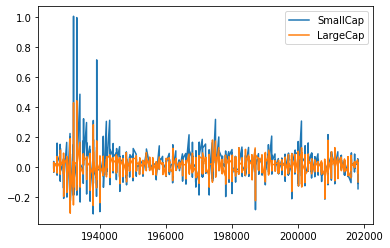

In [3]:
portSmallLarge = port_ret[['SmallCap', 'LargeCap']]

portSmallLarge.plot.line()

In [4]:
portSmallLarge.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [5]:
portSmallLarge.index = pd.to_datetime(portSmallLarge.index, format='%Y%m')

portSmallLarge.head()

,SmallCap,LargeCap
1926-07-01,-0.0043,0.0268
1926-08-01,0.0390,0.0209
1926-09-01,-0.0108,0.0016
1926-10-01,-0.0332,-0.0306
1926-11-01,-0.0046,0.0309


In [6]:
portSmallLarge.index = portSmallLarge.index.to_period('M')

portSmallLarge.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [7]:
portSmallLarge.loc['1926']

,SmallCap,LargeCap
1926-07,-0.0043,0.0268
1926-08,0.0390,0.0209
1926-09,-0.0108,0.0016
1926-10,-0.0332,-0.0306
1926-11,-0.0046,0.0309
1926-12,0.0254,0.0325


<AxesSubplot:>

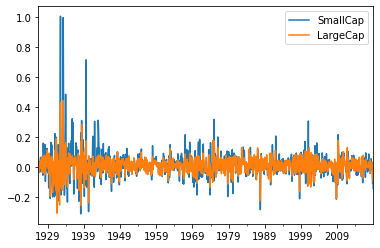

In [8]:
portSmallLarge.plot.line()

### Compute DrawDown

1. Compute a wealth index
2. Compute previous peaks
3. Compute DD - which is the wealth index value as % of the previous peak

In [9]:
# 1. Compute a wealth index
# Wealth index is simply the compounded returns
wealth_index = 1000 * (1 + portSmallLarge['LargeCap']).cumprod()

wealth_index.head()

1926-07    1026.800000
1926-08    1048.260120
1926-09    1049.937336
1926-10    1017.809254
1926-11    1049.259560
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

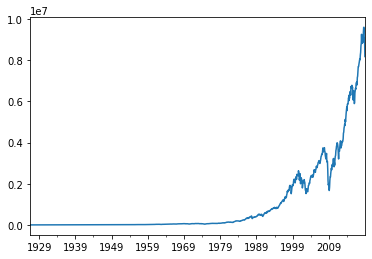

In [10]:
wealth_index.plot.line()

<AxesSubplot:>

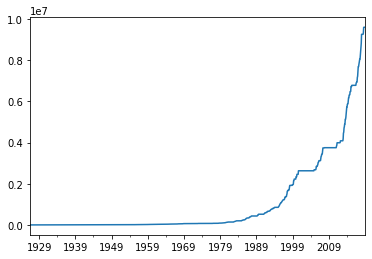

In [11]:
# 2. Compute previous peaks
previous_peaks = wealth_index.cummax()

previous_peaks.plot.line()

<AxesSubplot:>

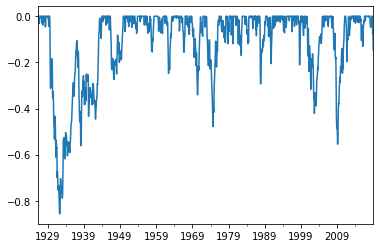

In [12]:
# 3. Compute DD - which is the wealth index value as % of the previous peak
DD = (wealth_index - previous_peaks) / previous_peaks

DD.plot.line()

In [13]:
# The max drawdown for the entire period
DD.min()

-0.8569436338889649

In [14]:
# The date
DD.idxmin()

Period('1932-05', 'M')

In [15]:
# The max drawdown from 1975 onwards
DD['1975':].min()

-0.5545514230708005

In [16]:
# The month of max D
DD['1975':].idxmin()

Period('2009-02', 'M')

In [17]:
# Create a function for getting the drawdown for all the categories

port_ret.head()

,SmallCap,MediumCap,LargeCap,Qnt 1,Qnt 2,Qnt 3,Qnt 4,Qnt 5,Dec 1,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Dec 10
192607,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


In [18]:
def drawdown(return_series):
    """
    Calculates the drawdown of asset returns over the said period
    Input: A pd.Series of asset returns
    Output: Wealth Index, Previous Peaks, Percent DD
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    df = pd.DataFrame({'Wealth': wealth_index, 'Peaks': previous_peaks, 'Drawdown': drawdowns})
    return df    

In [19]:
a = drawdown(port_ret['Qnt 1']).head()

a.head()

,Wealth,Peaks,Drawdown
192607,994.300000,994.30000,0.000000
192608,1032.481120,1032.48112,0.000000
192609,1027.525211,1032.48112,-0.004800
192610,993.719631,1032.48112,-0.037542
192611,988.254173,1032.48112,-0.042836
